# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other based on a distance measurement. Unlike traditional clustering algorithms like K-Means, which require the number of clusters to be specified in advance, DBSCAN can identify clusters of different shapes and sizes and automatically determine the number of clusters.

##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler


##Generating the Dataset

###make_moons

creates a 2D dataset with two moon-shaped clusters that are separated by a non-linear boundary. This type of dataset is useful for testing algorithms that can handle complex shapes and non-linearity.

In [ ]:
# Generate a dataset of 300 points with noise
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize the data (optional but often helps with clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Applying DBSCA

### Parameters

`eps (epsilon)`
* This parameter defines the maximum distance between two points for them to be considered as in the same neighborhood. Essentially, it sets the radius of the neighborhood around each data point. Points within this distance are considered neighbors. If eps is too large, clusters might merge into one large cluster, while if it is too small, many points might be classified as noise.

`min_samples`
* This parameter specifies the minimum number of points required to form a dense region (i.e., a cluster). It is used to determine whether a point is a core point or not. A core point has at least min_samples points (including itself) within its eps-radius. Points with fewer neighbors are considered border points or noise, depending on their location relative to core points.

In [17]:
# Initialize DBSCAN with epsilon and minPts parameters
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model to the data
dbscan.fit(X_scaled)

# Get the cluster labels
labels = dbscan.labels_


 ## Visualizing the Clusters

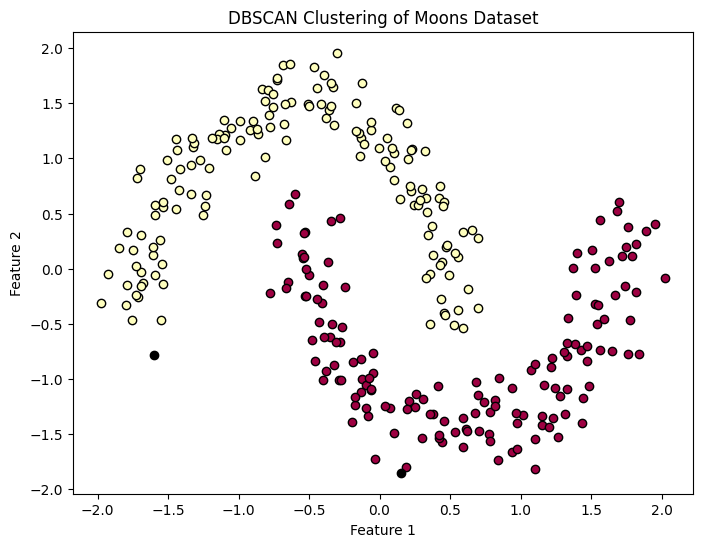

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering of Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Special Usages


###1. `Clustering Non-Linearly Separable Data`
* DBSCAN can find clusters of arbitrary shapes and sizes, making it well-suited for data that does not follow a simple geometric pattern. Unlike algorithms like K-Means, which assume spherical clusters, DBSCAN can identify complex, non-linear structures.

###2. `Handling Noise and Outliers`
* DBSCAN effectively identifies noise and outliers in the data. Points that do not belong to any cluster are classified as noise, which helps in dealing with datasets that include irrelevant or anomalous data points.

###3. `Geospatial Data Analysis`
* In geospatial analysis, DBSCAN is used for identifying clusters in spatial data, such as detecting regions with high concentrations of events (e.g., crime hotspots, traffic accidents). The eps parameter can be set to represent geographical distances, and min_samples can be adjusted to reflect the density of points.

###4. `Anomaly Detection`
* DBSCAN can be used for anomaly detection by identifying data points that do not belong to any cluster (i.e., outliers). This is particularly useful in applications like fraud detection, network security, and industrial monitoring.

###5. `Pattern Recognition`
* DBSCAN is used in pattern recognition tasks where the goal is to identify patterns or groups in data that have varying shapes and densities. It is often applied in image processing, text mining, and bioinformatics for clustering patterns that are not easily separable by traditional methods.

###6. `Data Preprocessing for Other Algorithms`
* In machine learning pipelines, DBSCAN can be used as a preprocessing step to remove noise and outliers before applying other clustering or classification algorithms. This can improve the performance and accuracy of subsequent models.

###7. `Market Segmentation`
* In marketing and customer analysis, DBSCAN can identify customer segments based on purchasing behavior or demographics. The ability to detect clusters of varying shapes and sizes helps in discovering unique customer segments and trends.

###8. `Anomaly Detection in Time Series`
* For time series data, DBSCAN can be adapted to identify anomalies by clustering temporal patterns. For instance, it can detect unusual patterns or deviations in financial markets or sensor data.

###9. `Bioinformatics`
* DBSCAN is used in bioinformatics for clustering gene expression data, protein structures, and other biological data where clusters may not be linearly separable and noise is present.

###10. `Text Clustering`
* In natural language processing, DBSCAN can be used to cluster text documents or terms based on their features, such as term frequency or embeddings. This helps in discovering themes or topics in large text corpora.

End